# **Patterns over time**

- To illustrate, we'll be working with a subset of a dataset about divorce filings taking place in Mexico from 2000 until 2015. 
- This data contains columns for marriage date and marriage duration in years.

In [ ]:
# import pandas library
import pandas as pd

# read the divorce.csv file into a pandas DataFrame
divorce = pd.read_csv("divorce.csv")

# display the first few rows of the DataFrame
divorce.head()

In [ ]:
marriage_date  marriage_duration
0    2000-06-26               5.0
1    2000-02-02               2.0
2    1991-10-09              10.0
3    1993-01-02              10.0
4    1998-12-11               7.0

# **Importing DateTime data**

- Before we can begin to look at potential patterns over time, we need to help pandas understand that data in a given column is in fact date or time data. 
- When a CSV file is imported into pandas, date and time data are typically interpreted as strings, as we see here.

- DateTime data needs to be explicitly declared to Pandas

In [ ]:
divorce.dtypes

In [ ]:
marriage_date     object
marriage_duration float64
dtype: object

- We can fix that by adding the parse_dates keyword argument to the CSV import and setting it equal to a list of column names that should be interpreted as DateTime data. 
- Now, when we check the data types of the imported CSV, the indicated column is a DateTime object. 
- This data type opens up many possibilities for analysis, such as looking at patterns over years, months, or even days of the week.

In [ ]:
# Import pandas library
import pandas as pd

# Read the CSV file 'divorce.csv' and parse 'marriage_date' column as dates.
divorce = pd.read_csv("divorce.csv", parse_dates=["marriage_date"])

# Print the data types of each column in the DataFrame.
divorce.dtypes

In [ ]:
marriage_date                 datetime64[ns]
marriage_duration              float64
dtype: object

# **Converting to DateTime data**

- Of course, we may wish to update data types to DateTime data after we import the data. 
- This is possible with pd-dot-to_datetime, which converts the argument passed to it to DateTime data. 
- Here, we pass the marriage_date column with values stored as strings to pd-dot-to_datetime. 
- This returns DateTime data which we save as the new marriage_date column.

- `pd.to_datetime()` converts arguments to DateTime data

In [ ]:
# Convert the 'marriage_date' column to datetime objects
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

# Display the data types of each column in the DataFrame
divorce.dtypes

In [ ]:
marriage_date        datetime64[ns]
marriage_duration      float64
dtype: object

# **Creating DateTime data**

- pd-dot-to_datetime has lots of other useful functionality. 
- For example, if a DataFrame has month, day, and year data stored in three different columns, as this one does, we can combine these columns into a single DateTime value by passing them to pd-dot-to_datetime. 
- Note that for this trick to work, columns must be named "month", "day", and "year", but can appear in any order in the DataFrame.

In [ ]:
divorce.head(2)

In [ ]:
   month  day  year  marriage_duration
0      6   26  2000                5.0
1      2    2  2000                2.0

In [ ]:
# Convert 'marriage_date' column to datetime objects
divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])

# Display the first 2 rows of the dataframe
divorce.head(2)

In [ ]:
   month  day  year  marriage_duration  marriage_date
0      6   26  2000               5.0     2000-06-26
1      2    2  2000               2.0     2000-02-02

- Conversely, we might want to extract just the month, day, or year from a column containing a full date. 
- If data is already stored in DateTime format, as marriage_date is, we can append dot-dt-dot-month to extract the month attribute, for example. 
- We'll save the month data as a new column in the DataFrame so that we can use it in our analysis.

- Extract parts of a full date using `dt.month`, `dt.day`, and `dt.year` attributes

In [ ]:
# Extract the month from the 'marriage_date' column and store it in a new 'marriage_month' column.
divorce["marriage_month"] = divorce["marriage_date"].dt.month

# Display the first few rows of the dataframe to verify the changes.
divorce.head()

In [ ]:
  marriage_date  marriage_duration  marriage_month
0    2000-06-26               5.0               6
1    2000-02-02               2.0               2
2    1991-10-09              10.0              10
3    1993-01-02              10.0               1
4    1998-12-11               7.0              12

# **Visualizing patterns over time**

- Line plots are a great way to examine relationships between variables. 
- In Seaborn, line plots aggregate y values at each value of x and show the estimated mean and a confidence interval for that estimate. 
- Perhaps we'd like to check whether there is any relationship between the month that a now-divorced couple got married and the length of their marriage. 
- We can set x equal to the marriage_month column and y equal to marriage_duration. 
- The results show some variation in mean marriage duration between months. 
- The blue line represents the mean marriage duration for our dataset, while the confidence intervals in the lighter blue shading indicate the area that, with 95% probability, the population mean duration could fall between. 
- The wide confidence intervals suggest that further analysis is needed!

In [ ]:
# Create the line plot
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")

# Display the plot
plt.show()

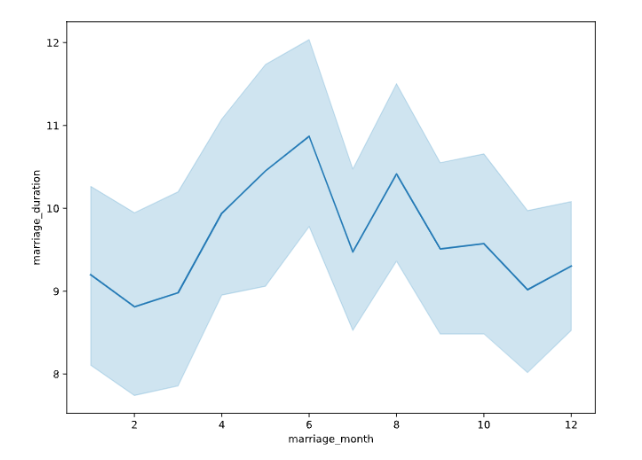